In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [31]:
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [32]:
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Visão Geral do Dataset

In [33]:
print('='*60)
print('INFORMACOES BASICAS DO DATASET')
print('='*60)
print(f'\nDimensoes: {train_df.shape[0]:,} linhas x {train_df.shape[1]} colunas')
print(f'\nColunas disponiveis:')
for i, col in enumerate(train_df.columns, 1):
    print(f'   {i:2}. {col}')
print(f'\nUso de memoria: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

INFORMACOES BASICAS DO DATASET

Dimensoes: 593,994 linhas x 13 colunas

Colunas disponiveis:
    1. id
    2. annual_income
    3. debt_to_income_ratio
    4. credit_score
    5. loan_amount
    6. interest_rate
    7. gender
    8. marital_status
    9. education_level
   10. employment_status
   11. loan_purpose
   12. grade_subgrade
   13. loan_paid_back

Uso de memoria: 223.31 MB


In [34]:
print('\nTipos de Dados:')
print(train_df.dtypes)
print('\n' + '='*60)
print('Resumo por tipo:')
print(train_df.dtypes.value_counts())


Tipos de Dados:
id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object

Resumo por tipo:
object     6
float64    5
int64      2
Name: count, dtype: int64


In [35]:
print('Primeiras 5 linhas:')
display(train_df.head())
print('\nUltimas 5 linhas:')
display(train_df.tail())

Primeiras 5 linhas:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0



Ultimas 5 linhas:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


## 2. Análise de Valores Ausentes (Missing Values)

In [36]:
missing_data = pd.DataFrame({
    'Valores Ausentes': train_df.isnull().sum(),
    'Porcentagem (%)': (train_df.isnull().sum() / len(train_df) * 100).round(2)
}).sort_values(by='Valores Ausentes', ascending=False)

print('Analise de Valores Ausentes:')
print('='*60)
display(missing_data)

if train_df.isnull().sum().sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 5))
    missing_cols = missing_data[missing_data['Valores Ausentes'] > 0]
    if len(missing_cols) > 0:
        bars = ax.bar(missing_cols.index, missing_cols['Porcentagem (%)'], color='coral', edgecolor='black')
        ax.set_xlabel('Colunas')
        ax.set_ylabel('Porcentagem de Missing (%)')
        ax.set_title('Porcentagem de Valores Ausentes por Coluna')
        plt.xticks(rotation=45, ha='right')
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=9)
        plt.tight_layout()
        plt.show()
else:
    print('\nNao ha valores ausentes no dataset!')

Analise de Valores Ausentes:


,Valores Ausentes,Porcentagem (%)
id,0,0.0
annual_income,0,0.0
debt_to_income_ratio,0,0.0
credit_score,0,0.0
loan_amount,0,0.0
interest_rate,0,0.0
gender,0,0.0
marital_status,0,0.0
education_level,0,0.0
employment_status,0,0.0



Nao ha valores ausentes no dataset!


## 3. Estatísticas Descritivas

In [37]:
print('Estatisticas Descritivas - Variaveis Numericas:')
print('='*60)
display(train_df.describe().T.style.format('{:.2f}').background_gradient(cmap='Blues'))

Estatisticas Descritivas - Variaveis Numericas:


,count,mean,std,min,25%,50%,75%,max
id,593994.00,296996.50,171471.44,0.00,148498.25,296996.50,445494.75,593993.00
annual_income,593994.00,48212.20,26711.94,6002.43,27934.40,46557.68,60981.32,393381.74
debt_to_income_ratio,593994.00,0.12,0.07,0.01,0.07,0.10,0.16,0.63
credit_score,593994.00,680.92,55.42,395.00,646.00,682.00,719.00,849.00
loan_amount,593994.00,15020.30,6926.53,500.09,10279.62,15000.22,18858.58,48959.95
interest_rate,593994.00,12.36,2.01,3.20,10.99,12.37,13.68,20.99
loan_paid_back,593994.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00


In [38]:
print('\nEstatisticas Descritivas - Variaveis Categoricas:')
print('='*60)
display(train_df.describe(include=['object']).T)


Estatisticas Descritivas - Variaveis Categoricas:


,count,unique,top,freq
gender,593994,3,Female,306175
marital_status,593994,4,Single,288843
education_level,593994,5,Bachelor's,279606
employment_status,593994,5,Employed,450645
loan_purpose,593994,8,Debt consolidation,324695
grade_subgrade,593994,30,C3,58695


## 4. Análise da Variável Target (loan_paid_back)

Distribuicao da Variavel Target (loan_paid_back):


,Contagem,Porcentagem (%)
loan_paid_back,,
1.0,474494,79.88
0.0,119500,20.12


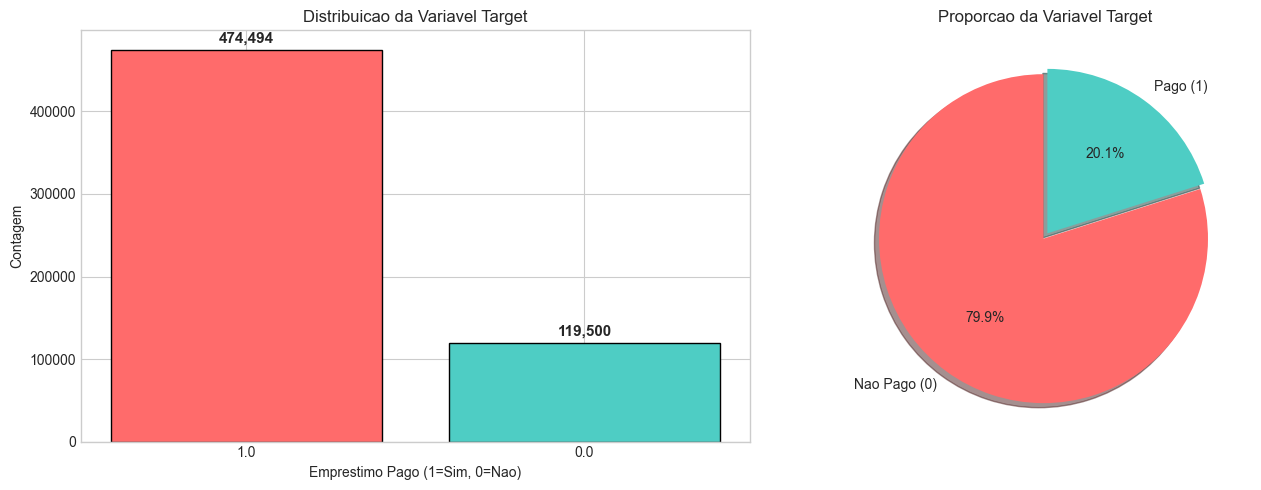


Razao de balanceamento: 25.18%
Dataset DESBALANCEADO - considerar tecnicas de balanceamento


In [39]:
print('Distribuicao da Variavel Target (loan_paid_back):')
print('='*60)
target_counts = train_df['loan_paid_back'].value_counts()
target_pct = train_df['loan_paid_back'].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Contagem': target_counts,
    'Porcentagem (%)': target_pct.round(2)
})
display(target_summary)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#ff6b6b', '#4ecdc4']
bars = axes[0].bar(target_counts.index.astype(str), target_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Emprestimo Pago (1=Sim, 0=Nao)')
axes[0].set_ylabel('Contagem')
axes[0].set_title('Distribuicao da Variavel Target')
for bar in bars:
    height = bar.get_height()
    axes[0].annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[1].pie(target_counts.values, labels=['Nao Pago (0)', 'Pago (1)'], autopct='%1.1f%%',
           colors=colors, explode=(0.02, 0.02), shadow=True, startangle=90)
axes[1].set_title('Proporcao da Variavel Target')

plt.tight_layout()
plt.show()

ratio = target_counts.min() / target_counts.max()
print(f'\nRazao de balanceamento: {ratio:.2%}')
print('Dataset DESBALANCEADO - considerar tecnicas de balanceamento')

## 5. Distribuição das Variáveis Numéricas

Variaveis Numericas: ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']


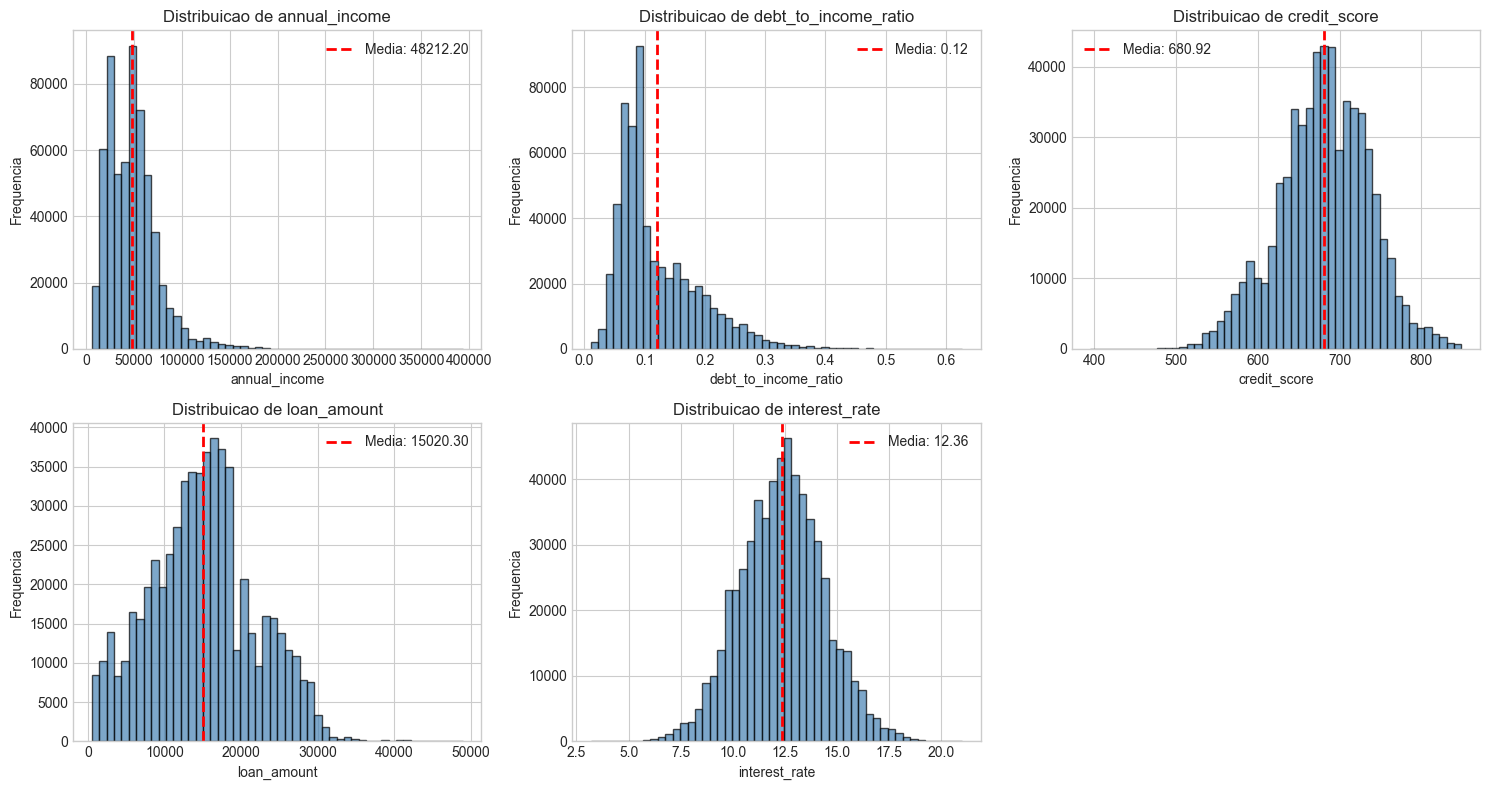

In [40]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['id', 'loan_paid_back']]

print(f'Variaveis Numericas: {numeric_cols}')

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    train_df[col].hist(bins=50, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribuicao de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequencia')

    mean_val = train_df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    ax.legend()

for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

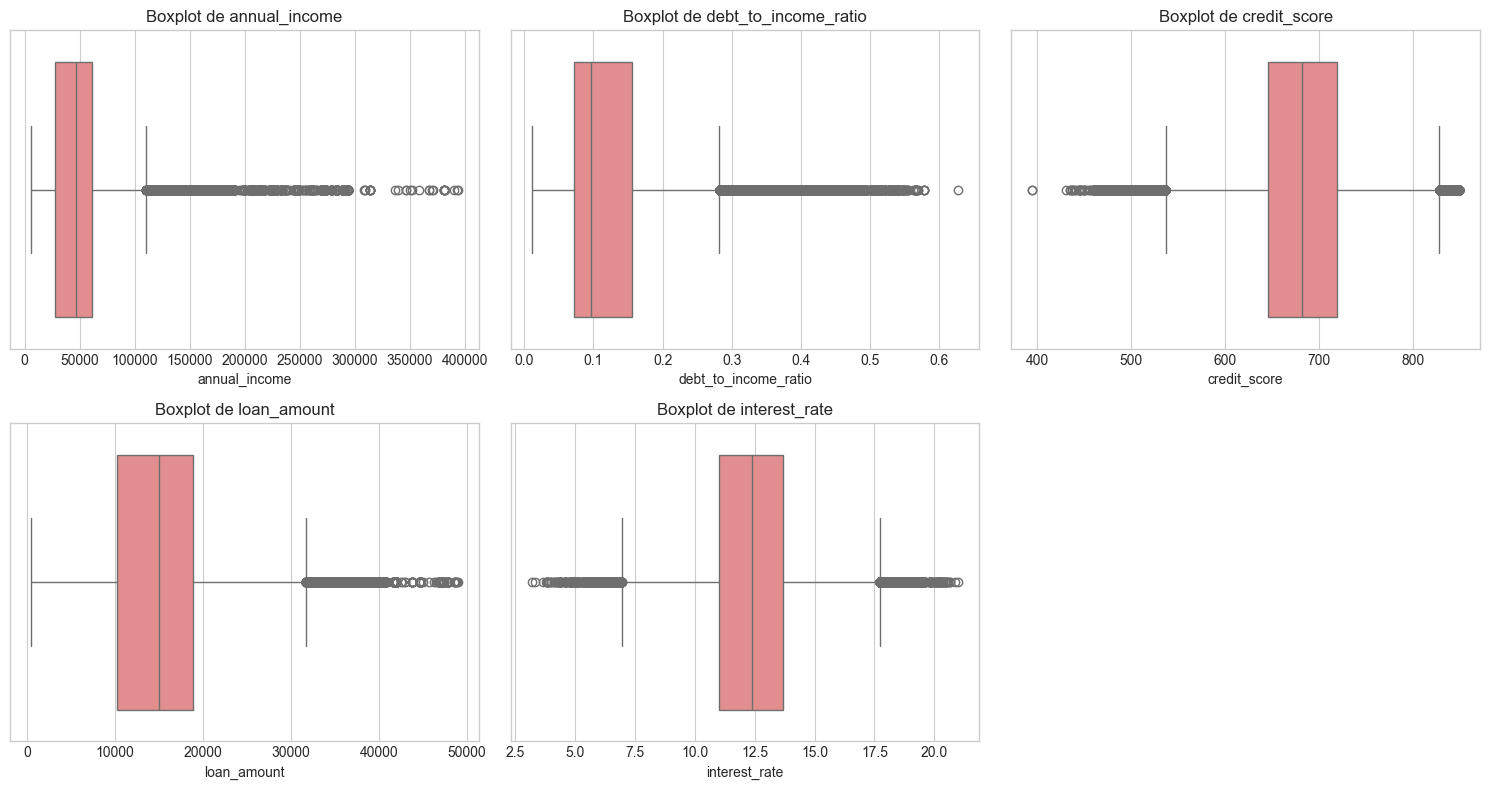

In [41]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.boxplot(data=train_df, x=col, ax=ax, color='lightcoral')
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [42]:
print('Analise de Outliers (Metodo IQR):')
print('='*60)

outlier_summary = []
for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
    outlier_pct = len(outliers) / len(train_df) * 100

    outlier_summary.append({
        'Coluna': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Limite Inferior': lower_bound,
        'Limite Superior': upper_bound,
        'N Outliers': len(outliers),
        'Outliers (%)': round(outlier_pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.style.background_gradient(subset=['Outliers (%)'], cmap='Reds'))

Analise de Outliers (Metodo IQR):


,Coluna,Q1,Q3,IQR,Limite Inferior,Limite Superior,N Outliers,Outliers (%)
0,annual_income,27934.400000,60981.320000,33046.920000,-21635.980000,110551.700000,15917,2.680000
1,debt_to_income_ratio,0.072000,0.156000,0.084000,-0.054000,0.282000,17556,2.960000
2,credit_score,646.000000,719.000000,73.000000,536.500000,828.500000,5901,0.990000
3,loan_amount,10279.620000,18858.580000,8578.960000,-2588.820000,31727.020000,2902,0.490000
4,interest_rate,10.990000,13.680000,2.690000,6.955000,17.715000,5136,0.860000


## 6. Distribuição das Variáveis Categóricas

In [43]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print(f'Variaveis Categoricas: {categorical_cols}')

print('\nValores unicos por variavel categorica:')
print('='*60)
for col in categorical_cols:
    unique_count = train_df[col].nunique()
    print(f'  {col}: {unique_count} valores unicos')

Variaveis Categoricas: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

Valores unicos por variavel categorica:
  gender: 3 valores unicos
  marital_status: 4 valores unicos
  education_level: 5 valores unicos
  employment_status: 5 valores unicos
  loan_purpose: 8 valores unicos
  grade_subgrade: 30 valores unicos


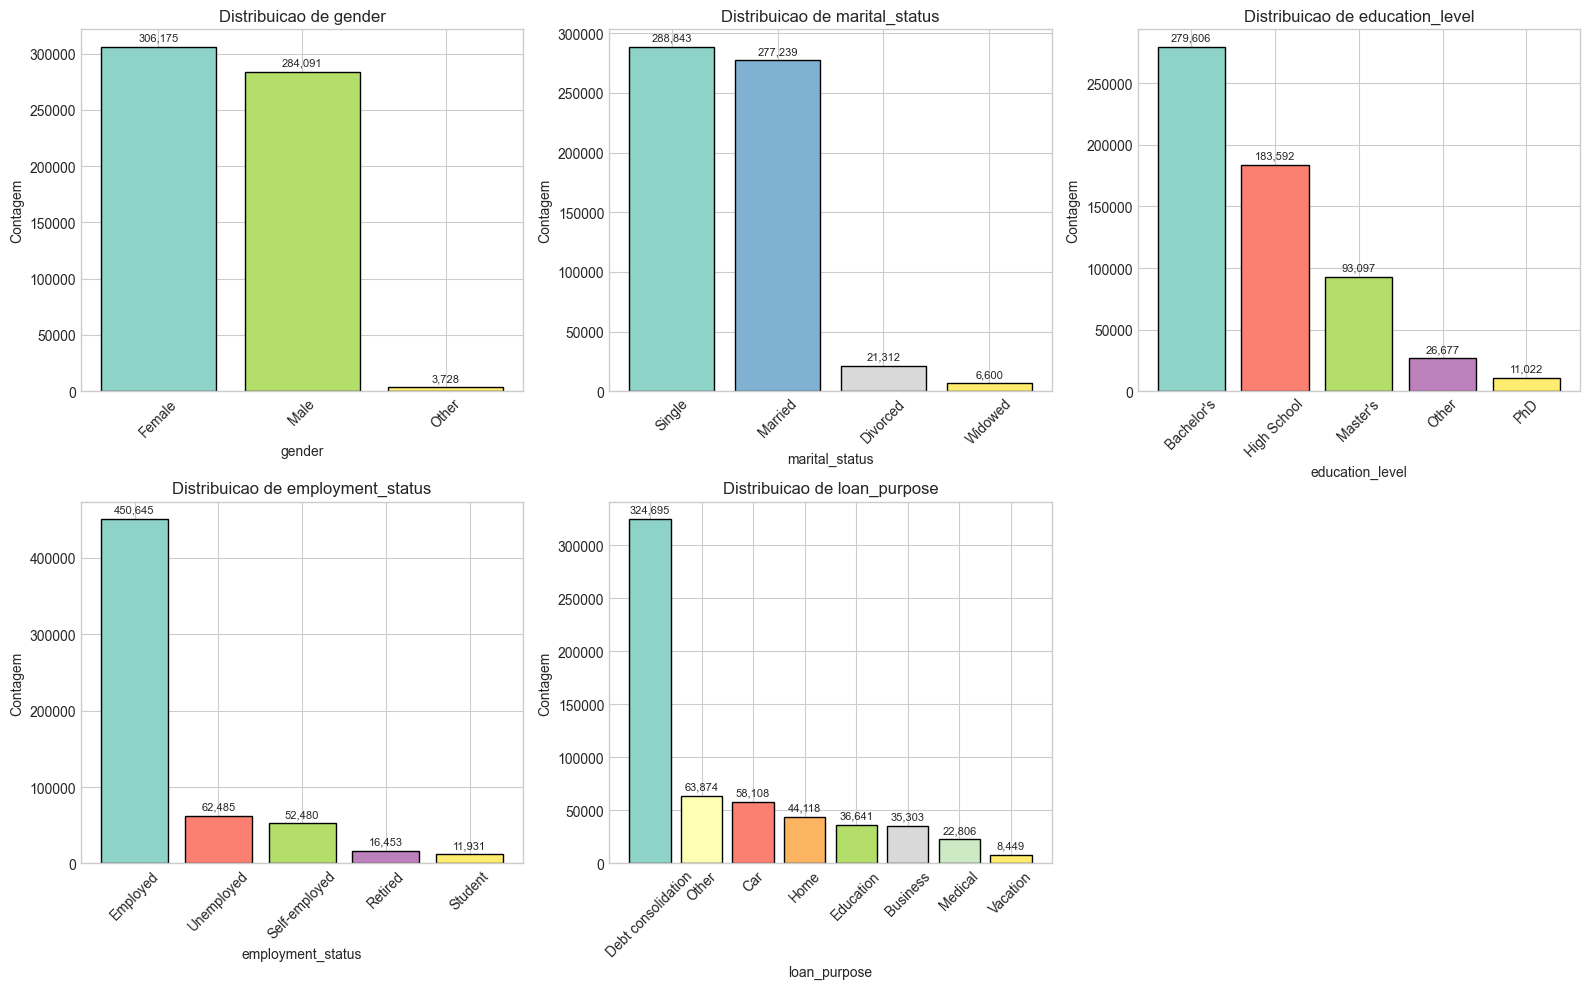

In [44]:
cat_cols_plot = [col for col in categorical_cols if col != 'grade_subgrade']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(cat_cols_plot):
    ax = axes[idx]
    value_counts = train_df[col].value_counts()
    bars = ax.bar(value_counts.index, value_counts.values, color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))), edgecolor='black')
    ax.set_title(f'Distribuicao de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', rotation=45)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

for idx in range(len(cat_cols_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

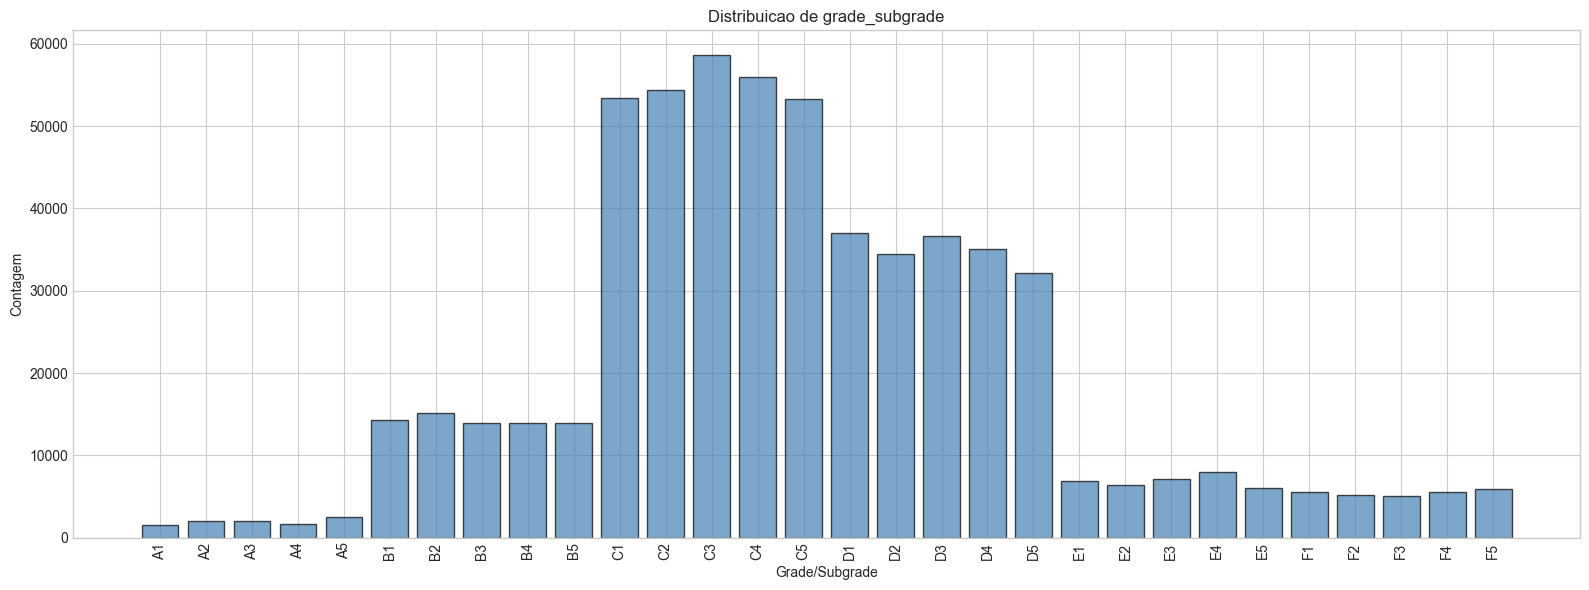


Total de categorias em grade_subgrade: 30


In [45]:
fig, ax = plt.subplots(figsize=(16, 6))
grade_counts = train_df['grade_subgrade'].value_counts().sort_index()
bars = ax.bar(grade_counts.index, grade_counts.values, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_title('Distribuicao de grade_subgrade')
ax.set_xlabel('Grade/Subgrade')
ax.set_ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f'\nTotal de categorias em grade_subgrade: {train_df["grade_subgrade"].nunique()}')

## 7. Análise de Correlação

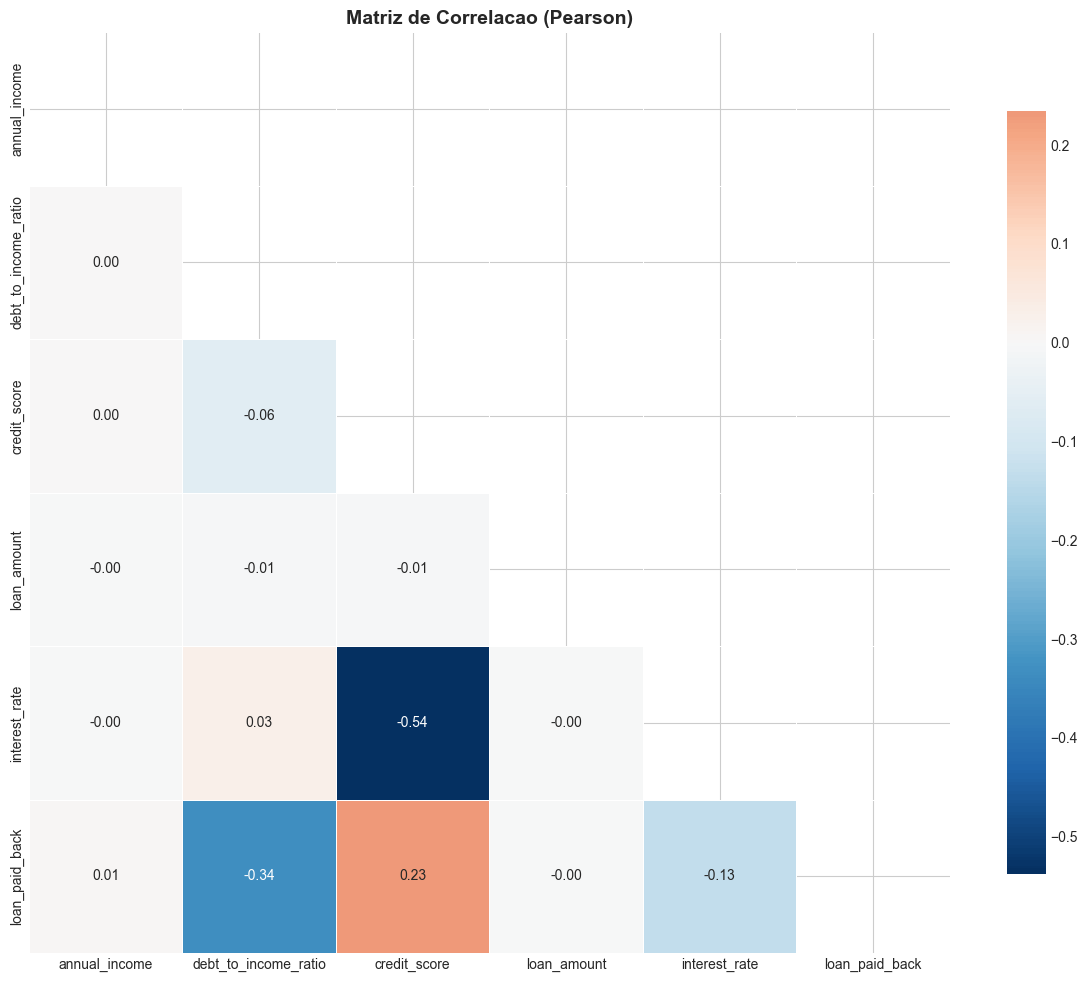

In [46]:
numeric_for_corr = train_df.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')

correlation_matrix = numeric_for_corr.corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax, cbar_kws={'shrink': 0.8})
ax.set_title('Matriz de Correlacao (Pearson)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Correlacao das variaveis com loan_paid_back:


,Correlacao com Target


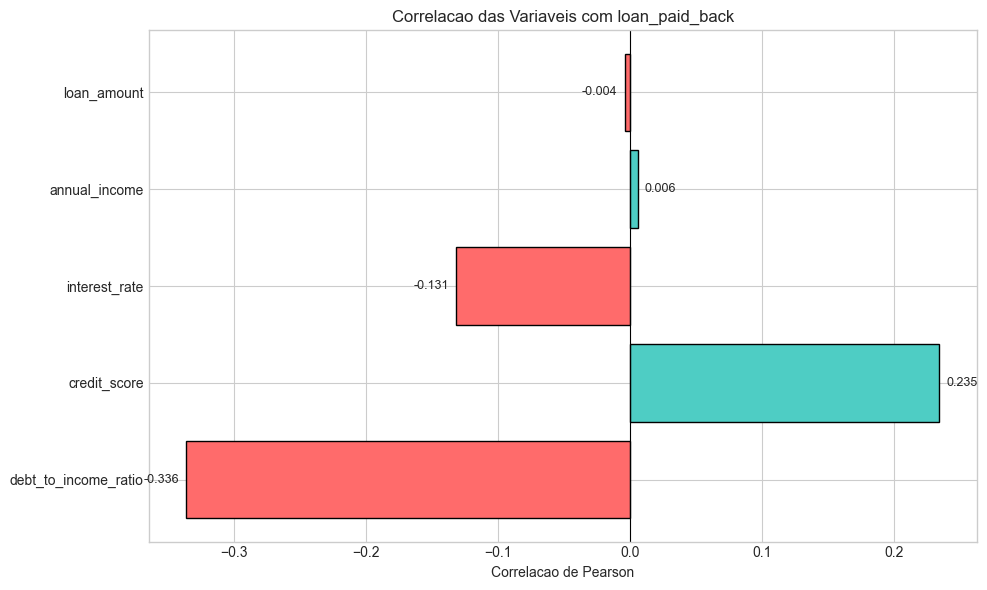

In [47]:
print('Correlacao das variaveis com loan_paid_back:')
print('='*60)

target_corr = correlation_matrix['loan_paid_back'].drop('loan_paid_back').sort_values(key=abs, ascending=False)
display(pd.DataFrame(target_corr, columns=['Correlacao com Target']).style.background_gradient(cmap='RdYlGn', vmin=-1, vmax=1))

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#ff6b6b' if x < 0 else '#4ecdc4' for x in target_corr.values]
bars = ax.barh(target_corr.index, target_corr.values, color=colors, edgecolor='black')
ax.set_xlabel('Correlacao de Pearson')
ax.set_title('Correlacao das Variaveis com loan_paid_back')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, bar.get_y() + bar.get_height()/2),
               xytext=(5 if width > 0 else -5, 0), textcoords='offset points',
               ha='left' if width > 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 8. Análise Bivariada - Variáveis Numéricas vs Target

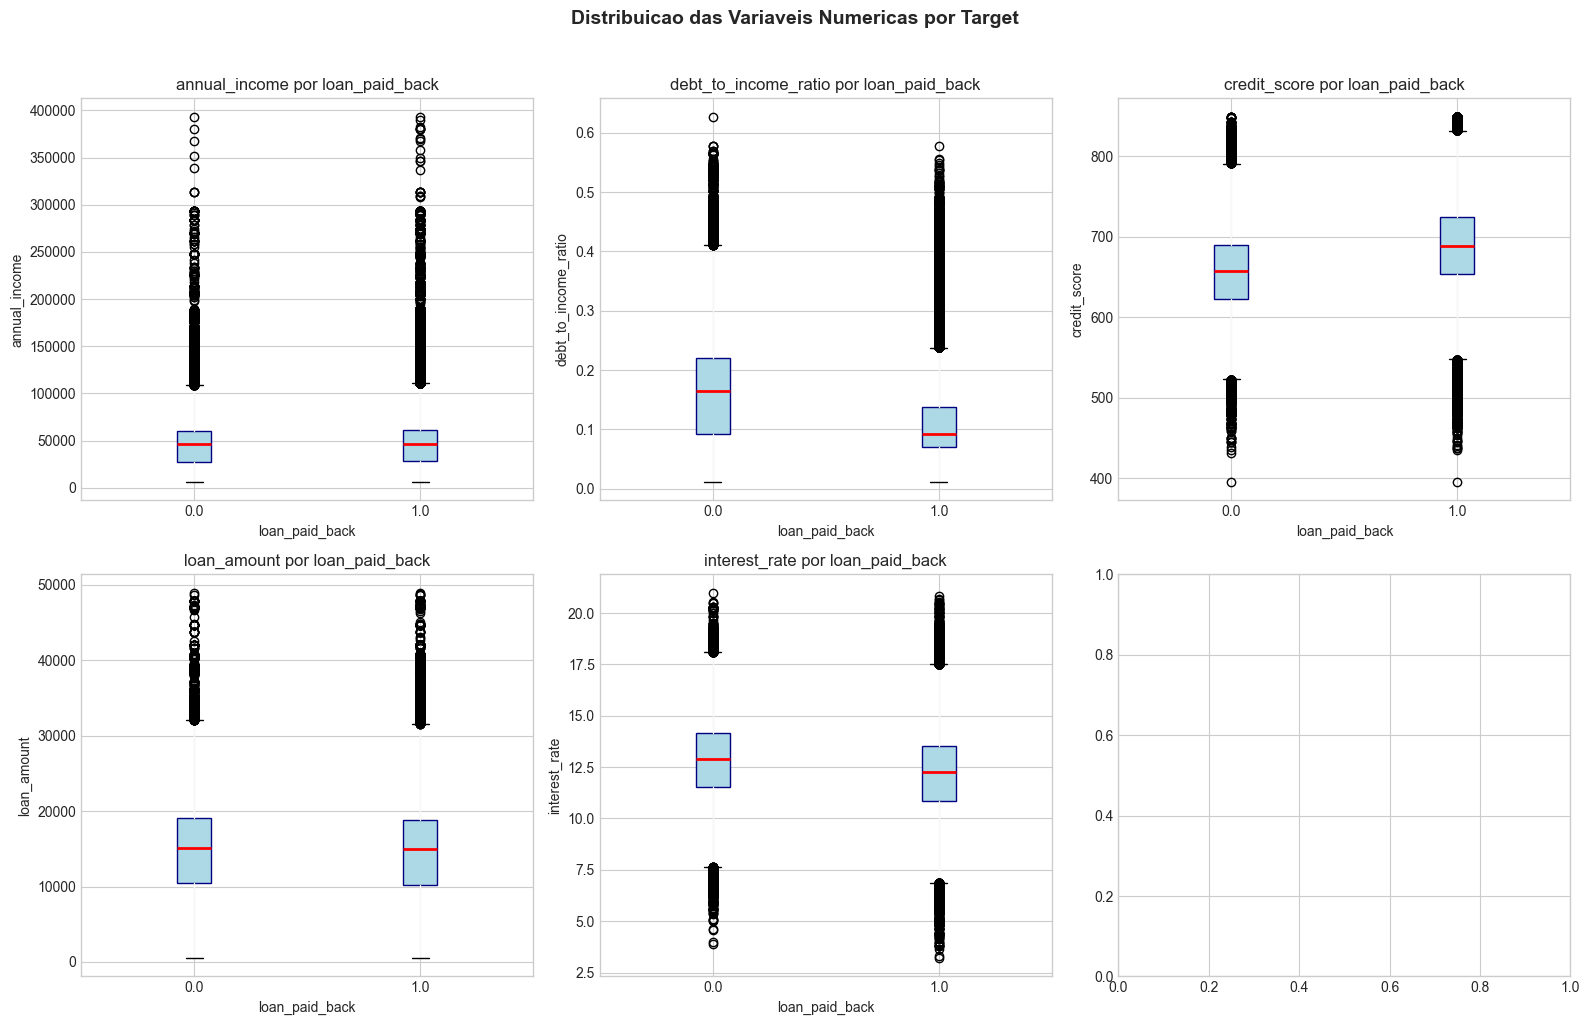

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    ax = axes[idx]
    train_df.boxplot(column=col, by='loan_paid_back', ax=ax,
                     patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='navy'),
                     medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'{col} por loan_paid_back')
    ax.set_xlabel('loan_paid_back')
    ax.set_ylabel(col)

plt.suptitle('Distribuicao das Variaveis Numericas por Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

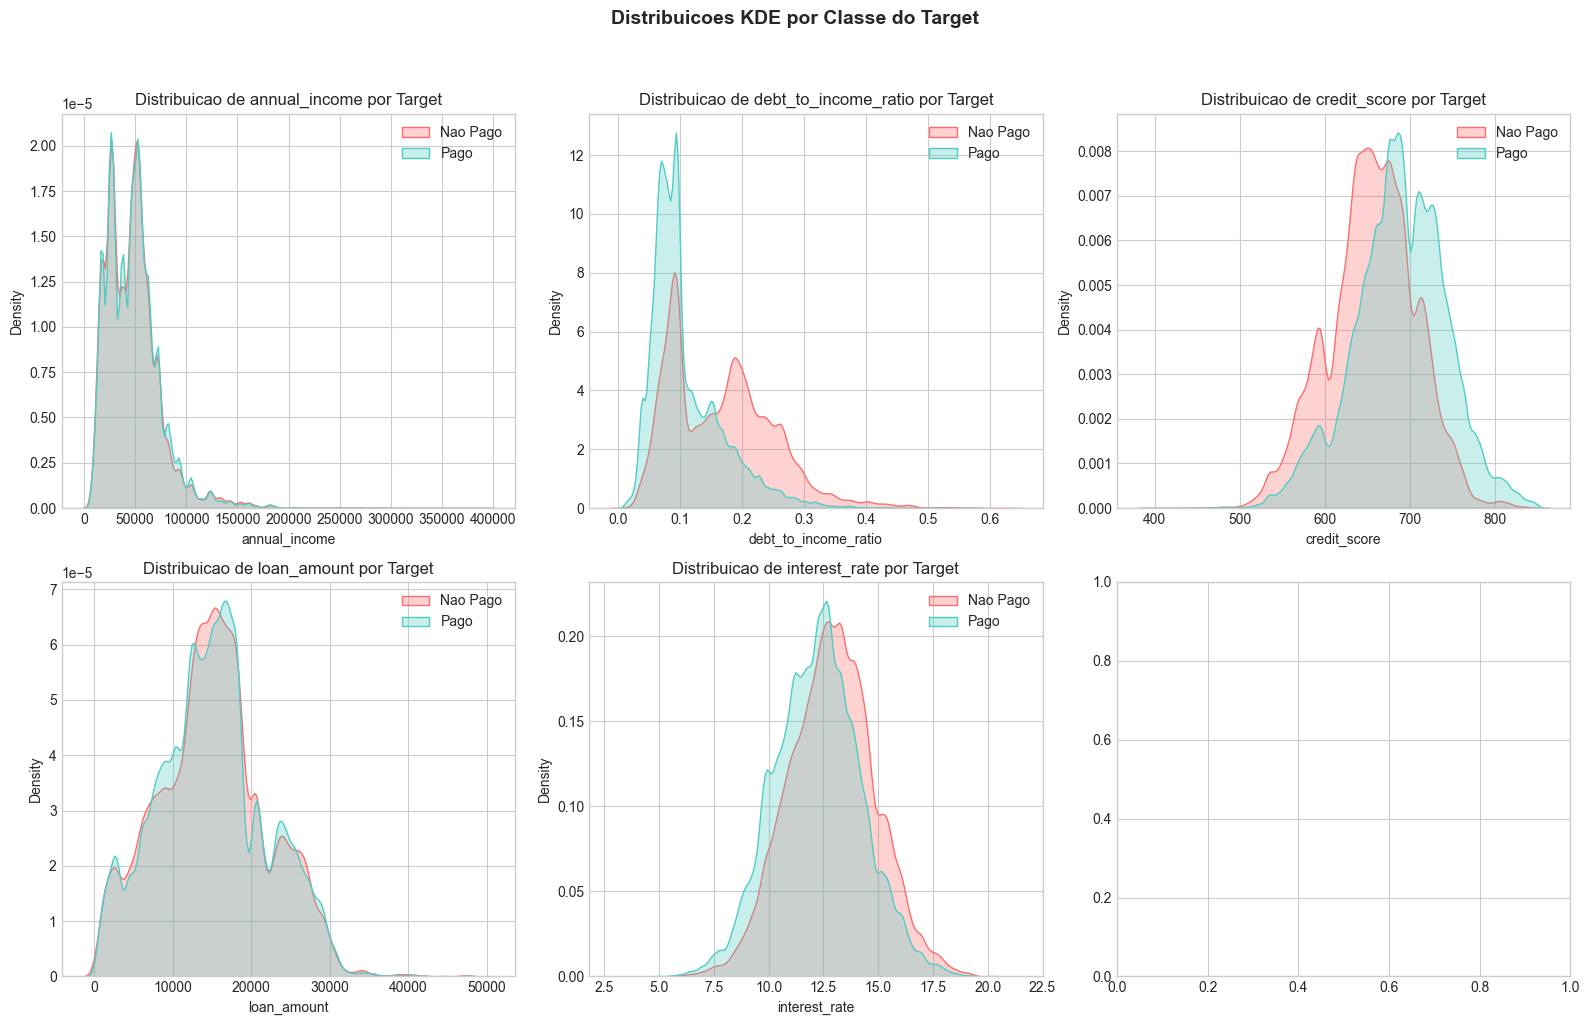

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    ax = axes[idx]
    for target_val in [0.0, 1.0]:
        subset = train_df[train_df['loan_paid_back'] == target_val][col].dropna()
        label = 'Nao Pago' if target_val == 0 else 'Pago'
        color = '#ff6b6b' if target_val == 0 else '#4ecdc4'
        sns.kdeplot(data=subset, ax=ax, label=label, color=color, fill=True, alpha=0.3)
    ax.set_title(f'Distribuicao de {col} por Target')
    ax.set_xlabel(col)
    ax.legend()

plt.suptitle('Distribuicoes KDE por Classe do Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 9. Análise Bivariada - Variáveis Categóricas vs Target

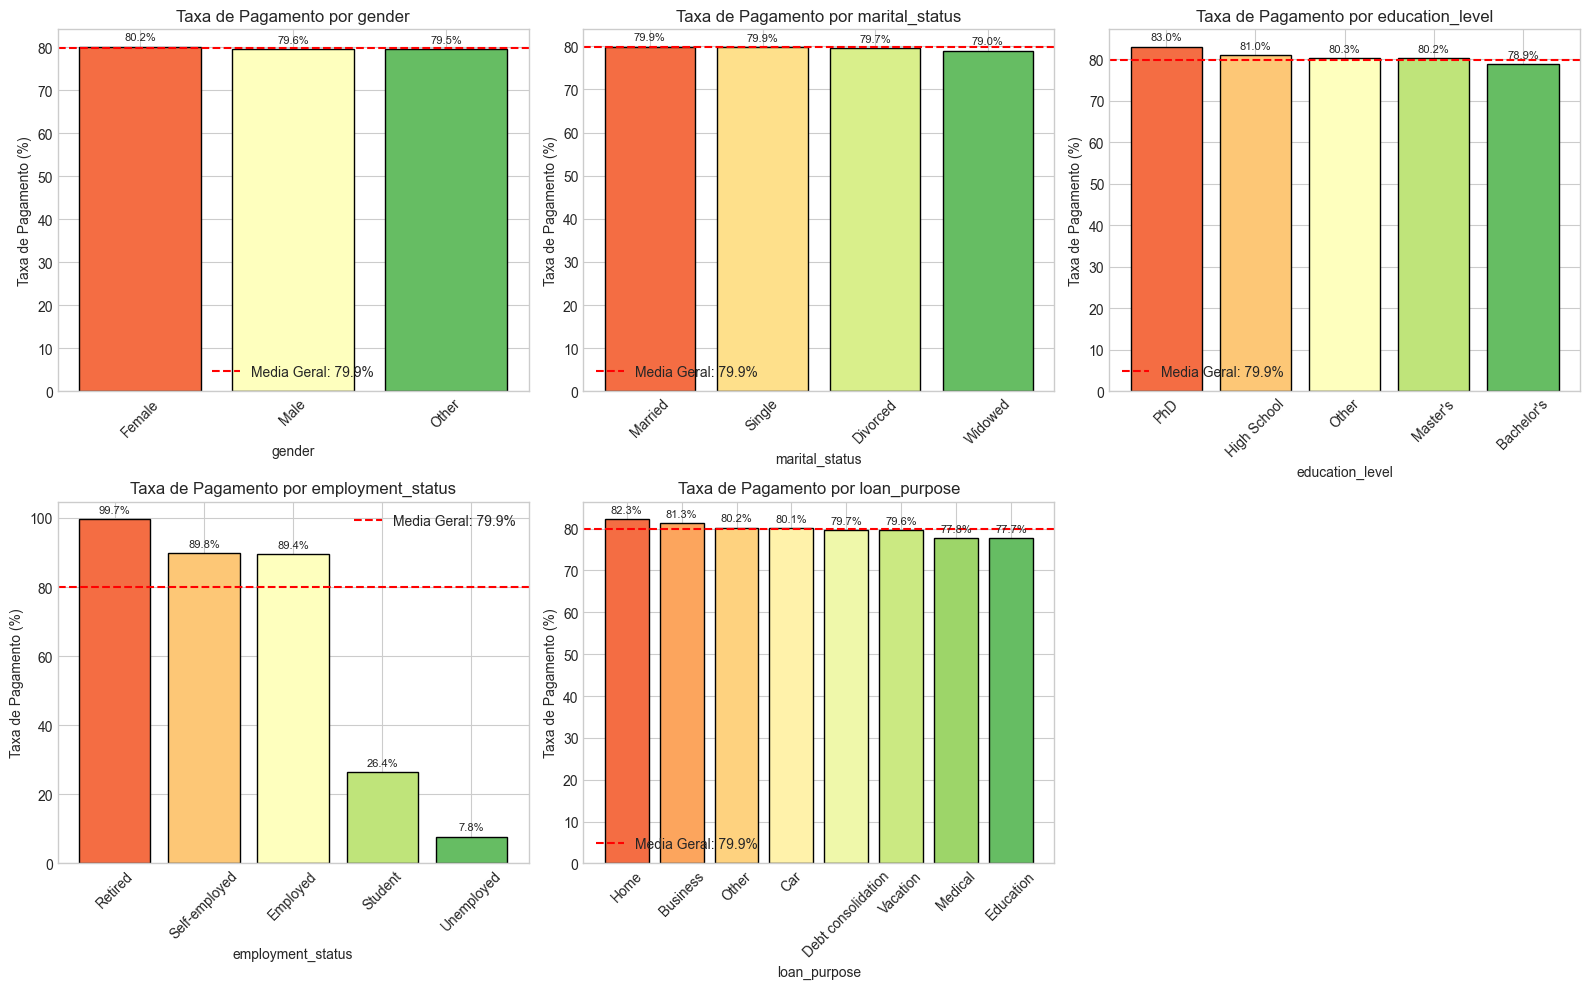

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(cat_cols_plot):
    ax = axes[idx]

    pay_rate = train_df.groupby(col)['loan_paid_back'].mean().sort_values(ascending=False)

    colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(pay_rate)))
    bars = ax.bar(pay_rate.index, pay_rate.values * 100, color=colors, edgecolor='black')
    ax.set_title(f'Taxa de Pagamento por {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Taxa de Pagamento (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=train_df['loan_paid_back'].mean() * 100, color='red', linestyle='--',
               label=f'Media Geral: {train_df["loan_paid_back"].mean()*100:.1f}%')
    ax.legend()

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

for idx in range(len(cat_cols_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

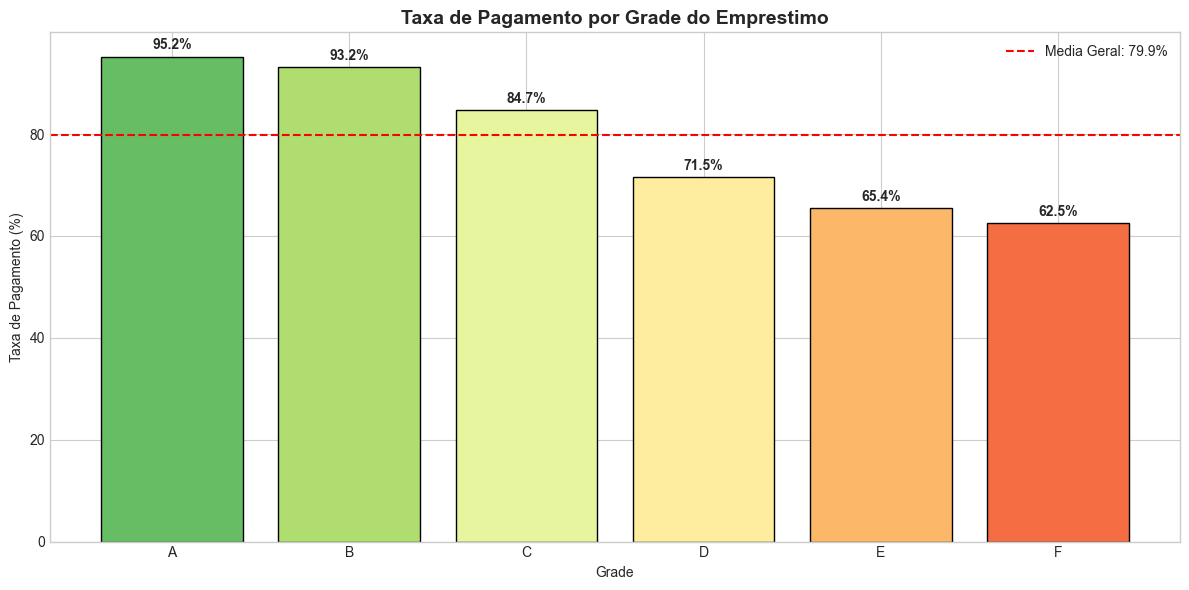


Estatisticas por Grade:


,Taxa de Pagamento,Contagem
grade,,
A,95.21%,"9,856"
B,93.20%,"71,251"
C,84.73%,"275,775"
D,71.53%,"175,353"
E,65.44%,"34,458"
F,62.52%,"27,301"


In [51]:
train_df['grade'] = train_df['grade_subgrade'].str[0]

fig, ax = plt.subplots(figsize=(12, 6))
grade_pay_rate = train_df.groupby('grade')['loan_paid_back'].agg(['mean', 'count']).sort_index()
grade_pay_rate.columns = ['Taxa de Pagamento', 'Contagem']

colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(grade_pay_rate)))
bars = ax.bar(grade_pay_rate.index, grade_pay_rate['Taxa de Pagamento'] * 100, color=colors, edgecolor='black')
ax.set_title('Taxa de Pagamento por Grade do Emprestimo', fontsize=14, fontweight='bold')
ax.set_xlabel('Grade')
ax.set_ylabel('Taxa de Pagamento (%)')
ax.axhline(y=train_df['loan_paid_back'].mean() * 100, color='red', linestyle='--',
           label=f'Media Geral: {train_df["loan_paid_back"].mean()*100:.1f}%')
ax.legend()

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
               xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print('\nEstatisticas por Grade:')
display(grade_pay_rate.style.format({'Taxa de Pagamento': '{:.2%}', 'Contagem': '{:,.0f}'}))

## 10. Pairplot - Relações entre Variáveis Principais

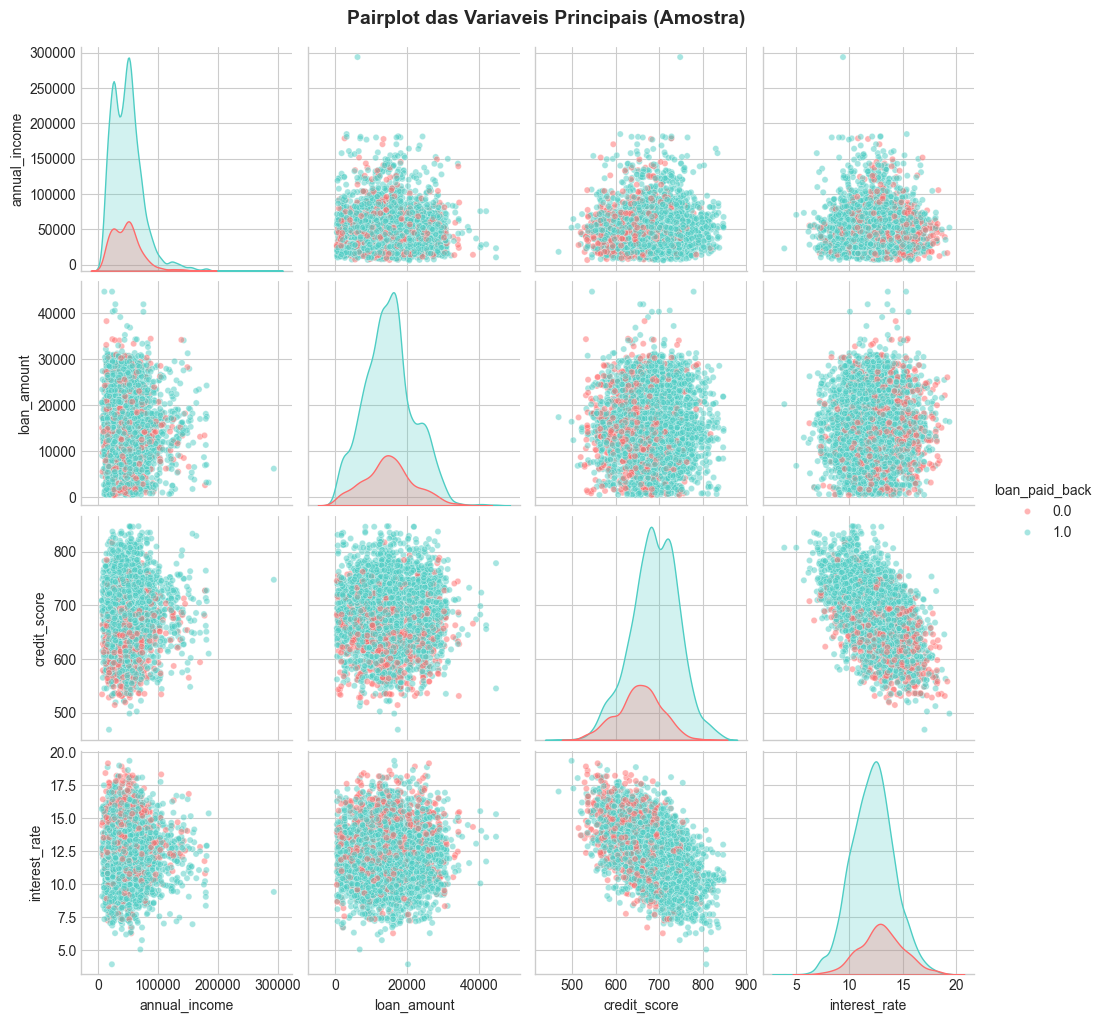

In [52]:
sample_size = min(5000, len(train_df))
sample_df = train_df.sample(n=sample_size, random_state=42)

main_features = ['annual_income', 'loan_amount', 'credit_score', 'interest_rate', 'loan_paid_back']

g = sns.pairplot(sample_df[main_features], hue='loan_paid_back',
                 palette={0.0: '#ff6b6b', 1.0: '#4ecdc4'},
                 diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
g.fig.suptitle('Pairplot das Variaveis Principais (Amostra)', y=1.02, fontsize=14, fontweight='bold')
plt.show()

## 11. Análise de Feature Engineering Potencial

Feature Engineering - Analise de Potenciais Novas Features:


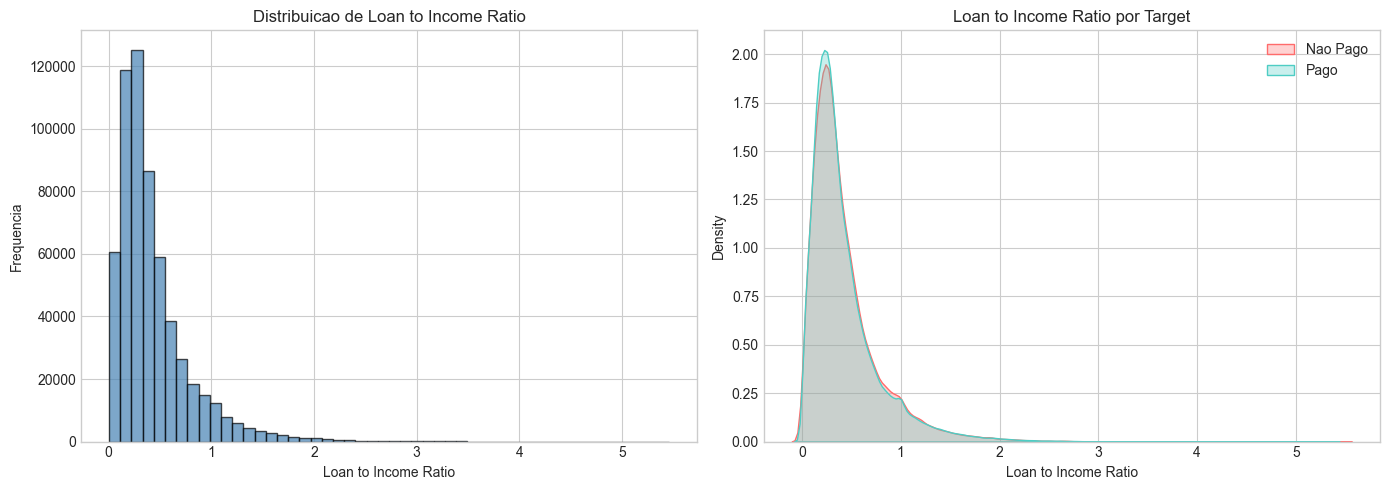


Correlacao de loan_to_income_ratio com target: -0.0056


In [53]:
print('Feature Engineering - Analise de Potenciais Novas Features:')
print('='*60)

train_df['loan_to_income_ratio'] = train_df['loan_amount'] / train_df['annual_income']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['loan_to_income_ratio'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuicao de Loan to Income Ratio')
axes[0].set_xlabel('Loan to Income Ratio')
axes[0].set_ylabel('Frequencia')

for target_val in [0.0, 1.0]:
    subset = train_df[train_df['loan_paid_back'] == target_val]['loan_to_income_ratio'].dropna()
    label = 'Nao Pago' if target_val == 0 else 'Pago'
    color = '#ff6b6b' if target_val == 0 else '#4ecdc4'
    sns.kdeplot(data=subset, ax=axes[1], label=label, color=color, fill=True, alpha=0.3)
axes[1].set_title('Loan to Income Ratio por Target')
axes[1].set_xlabel('Loan to Income Ratio')
axes[1].legend()

plt.tight_layout()
plt.show()

corr_new = train_df['loan_to_income_ratio'].corr(train_df['loan_paid_back'])
print(f'\nCorrelacao de loan_to_income_ratio com target: {corr_new:.4f}')

## 12. Resumo e Insights Principais

In [54]:
print('='*70)
print('RESUMO DA ANALISE EXPLORATORIA DE DADOS (EDA)')
print('='*70)

print(f'''
DIMENSOES DO DATASET:
   Total de registros: {train_df.shape[0]:,}
   Total de features: {train_df.shape[1] - 1} (excluindo id)

VARIAVEL TARGET (loan_paid_back):
   Pago (1): {(train_df['loan_paid_back'] == 1).sum():,} ({(train_df['loan_paid_back'] == 1).mean()*100:.1f}%)
   Nao Pago (0): {(train_df['loan_paid_back'] == 0).sum():,} ({(train_df['loan_paid_back'] == 0).mean()*100:.1f}%)

VALORES AUSENTES:
   Total de valores ausentes: {train_df.isnull().sum().sum():,}

VARIAVEIS NUMERICAS ({len(numeric_cols)}):
   {', '.join(numeric_cols)}

VARIAVEIS CATEGORICAS ({len(categorical_cols)}):
   {', '.join(categorical_cols)}

PRINCIPAIS CORRELACOES COM O TARGET:
''')

for col, corr in target_corr.head(5).items():
    print(f'   {col}: {corr:.4f}')

RESUMO DA ANALISE EXPLORATORIA DE DADOS (EDA)

DIMENSOES DO DATASET:
   Total de registros: 593,994
   Total de features: 14 (excluindo id)

VARIAVEL TARGET (loan_paid_back):
   Pago (1): 474,494 (79.9%)
   Nao Pago (0): 119,500 (20.1%)

VALORES AUSENTES:
   Total de valores ausentes: 0

VARIAVEIS NUMERICAS (5):
   annual_income, debt_to_income_ratio, credit_score, loan_amount, interest_rate

VARIAVEIS CATEGORICAS (6):
   gender, marital_status, education_level, employment_status, loan_purpose, grade_subgrade

PRINCIPAIS CORRELACOES COM O TARGET:

   debt_to_income_ratio: -0.3357
   credit_score: 0.2346
   interest_rate: -0.1312
   annual_income: 0.0063
   loan_amount: -0.0038
